# TUTORIAL 2: Similarity Measures on Sets and Strings
<hr style="border:2px solid black"> </hr>

# 1. Similarity Measures on Sets

- Lecture slides: 37-44
- Certain types of data can be represented by vectors or **sets of objects**. 
- A set typically contains each element only once: set1= {a, b, c, d}
- For instance, a document can be represented by a set of words it contains. An example of two documents as sets of words:

Doc1 = (predicting, diseases, phenotypes, genotypes, ...)  
Doc2 = (genetic, heterogeneity, sequence, phenotypes, ...)


## 1.1 Similarity Measures for Sets of Objects

##### Jaccard coefficient
\begin{equation*}jaccard(A,B) = \frac{|A \cap B|}{|A \cup B|}\end{equation*}

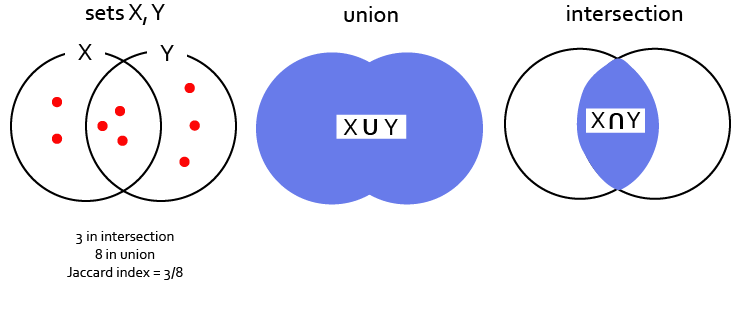

In [6]:
from IPython import display
display.Image("./image1.png")

**Union:** All elements that are contained in either datasets

**Intersection:** all elements that are common to both datasets


##### Overlap coefficient  
\begin{equation*}overlap(A,B) = \frac{|A \cap B|}{min(|A|,|B|)}\end{equation*}

##### Sorensen-Dice coefficient
\begin{equation*}sorensen\_dice(A,B) = \frac{2 \times |A \cap B|}{|A| +|B|}\end{equation*}

Percentage of overlap between two sets, which is a value between 0 and 1



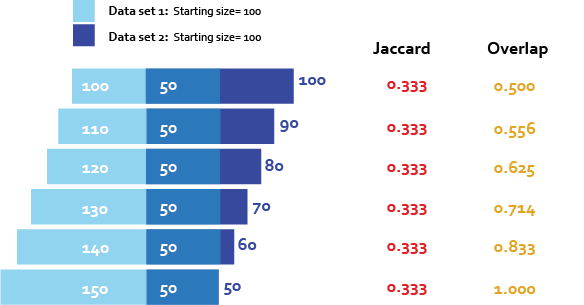

In [7]:
from IPython import display
display.Image("./image2.png")

<hr style="border:2px solid black"> </hr>
<hr style="border:2px solid white"> </hr>


## 1.2 Implementation in Python

- The *set()* method is a very useful python data structure, which is used to convert any of the iterable to sequence of iterable elements with distinct elements, commonly called Set. 
- intersection, union, differences, ... of sets

In [8]:
#  Define functions for similarity measures

def jaccard(l1, l2):    # l1=list 1 and l2 = list 2
    s1 = set(l1)
    s2 = set(l2)
    union = s1.union(s2)  # equivalent to s1 | s2
    if len(union) == 0:   # Check if the length of the union is equal to zero
        raise Exception('Two input sets are empty!')
    intersection = s1.intersection(s2)  # equivalent to s1 & s2
    return len(intersection) / len(union)

def overlap(l1, l2):
    s1 = set(l1)
    s2 = set(l2)
    minimum = min(len(s1), len(s2))
    if minimum == 0:
        raise Exception('Either l1 or l2 is empty')
    intersection = s1.intersection(s2)
    return len(intersection) / minimum

def sorensen_dice(l1, l2):
    s1 = set(l1)
    s2 = set(l2)
    sets_lenghts_sum = len(s1) + len(s2)
    if sets_lenghts_sum == 0:
        raise Exception('Both sets are empty!')
    intersection = s1.intersection(s2)
    return 2.0 * len(intersection) / sets_lenghts_sum


## 1.3 Two Short Dummy Examples

### 1.3.1 Dummy set 1

In [9]:
# Create function to summarize the documents
def summarize_docs(doc1, doc2):
    
    print('A = {0}'.format(doc1))
    print('B = {0}\n'.format(doc2))

    print('|A| = {0}'.format(len(doc1))) # print the length/cardinality of set A
    print('|B| = {0}'.format(len(doc2))) # print the length/cardinality of set B
    print('|A.union(B)| = {0}'.format(len(set(doc1) | set(doc2)))) # print the intersection
    print('|A.intersection(B)| = {0}\n'.format(len(set(doc1) & set(doc2))))
    

In [10]:
# create documents
doc1 = ['computer', 'notebook', 'laptop', 'python', 'anaconda', 'viper', 'cobra']
doc2 = ['computer', 'notebook', 'laptop']

# print summaries
summarize_docs(doc1, doc2)

# compute set-similarity-measures
print('Jaccard coefficient:  {0:.4f}'.format(jaccard(doc1, doc2)))
print('Overlap coefficient:  {0:.4f}'.format(overlap(doc1, doc2)))
print('Sorensen-Dice coeff.: {0:.4f}'.format(sorensen_dice(doc1, doc2)))

A = ['computer', 'notebook', 'laptop', 'python', 'anaconda', 'viper', 'cobra']
B = ['computer', 'notebook', 'laptop']

|A| = 7
|B| = 3
|A.union(B)| = 7
|A.intersection(B)| = 3

Jaccard coefficient:  0.4286
Overlap coefficient:  1.0000
Sorensen-Dice coeff.: 0.6000


### 1.3.2 Dummy set 2

In [12]:
# create documents
doc3 = ['computer', 'notebook', 'laptop', 'python', 'anaconda', 'viper', 'cobra']
doc4 = ['computer', 'notebook', 'laptop', 'matlab', 'mathworks', 'r_language', 's_language']

# print summaries
summarize_docs(doc3, doc4)

# compute set-similarity-measures
print('Jaccard coefficient:  {0:.4f}'.format(jaccard(doc1, doc2)))
print('Overlap coefficient:  {0:.4f}'.format(overlap(doc1, doc2)))
print('Sorensen-Dice coeff.: {0:.4f}'.format(sorensen_dice(doc1, doc2)))

A = ['computer', 'notebook', 'laptop', 'python', 'anaconda', 'viper', 'cobra']
B = ['computer', 'notebook', 'laptop', 'matlab', 'mathworks', 'r_language', 's_language']

|A| = 7
|B| = 7
|A.union(B)| = 11
|A.intersection(B)| = 3

Jaccard coefficient:  0.4286
Overlap coefficient:  1.0000
Sorensen-Dice coeff.: 0.6000


## 1.4 Real-World Example: Comparing Topic-Related Emails

### Input-Files

##### stopwords.txt 

A single column list of words to ignore in the document analysis. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) **to eliminate words** that are **so commonly used** that they carry very little useful information. Some examples are: 

the  
me  
a  
is   
are  
...

##### file_info.txt

Two columns, tab-delimited, first column is the name of the document, second column category/type of the document:

38432	comp.graphics  
51586	comp.sys.mac.hardware  
...

##### 102939

An example document shown below:

From: etxmst@sta.ericsson.se (Markus Strobl 98121)  
Subject: Renting from Alamo	  
Nntp-Posting-Host: st83.ericsson.se  
Reply-To: etxmst@sta.ericsson.se  
Organization: Ericsson Telecom AB  
Lines: 20  

Hello netters!

I'm visiting the US (I'm from Sweden) in August. ...


### Reading the Input Files

1. We read all the data described in "file_info.txt" into a dictionary.
2. For each file we use a function "preprocess" from "preprocess_newsgroup.py" to preprocess each document by removing the header, quotes, footer, punctuation marks and stopwords. Additionally, the script transforms strings to lower-case and finally, the document is split into a list of words.
3. Output information about the created dictionary

In [14]:
# Function preprocess has been already implemented for us
from preprocess_newsgroup import preprocess
import os    # provides a portable way of using operating system dependent functionality
import numpy as np

# Read a single-column 'data/stopwords.txt' as a text array using numpy
stopwords = np.loadtxt('data/stopwords.txt', dtype=str)

# Read 'data/file_info.txt' into a dictionary indexed by document categories (keys)
# every category contains a list of its documents
# every document is represented as a list of words
document_dict = dict()
with open('data/file_info.txt') as f_in:
    for line in f_in:
        
        doc_filename, group_name = line.rstrip().split('\t') # strip away the white space and split strings 
                                                            # into tokens by specifing a parameter (here: tabular)
        
        if group_name not in document_dict:  # Note: This can be circumvented with defaultdict
            document_dict[group_name] = []

        list_of_words = preprocess(os.path.join('data', doc_filename), stopwords)
        # Not removing stopwords can considerably inflate similarities...
        #list_of_words = preprocess(os.path.join('data', doc_filename), [])
        document_dict[group_name].append(list_of_words)


In [19]:
# print some info about dict_doc
print ('{0} categories read: \n'.format(len(document_dict)))
for idx, doc_class in enumerate(document_dict):
    print ('{0}. {1}: {2} documents.'.format(idx+1, doc_class, len(document_dict[doc_class])))
    
first_category = list(document_dict.keys())[1]
print ('\nSome words from the first document of "{0}" category:\n'.format(first_category))
for i in range(min(7, len(document_dict[first_category][0]))):
    print ('"{0}"'.format(document_dict[first_category][0][i])) # second key (0) stands for the first document of this cat
                                                                # iterating over i allows us to explore the words

5 categories read: 

1. comp.graphics: 10 documents.
2. comp.sys.mac.hardware: 10 documents.
3. rec.autos: 10 documents.
4. talk.politics.guns: 10 documents.
5. talk.religion.misc: 10 documents.

Some words from the first document of "comp.sys.mac.hardware" category:

"original"
"mac"
"ii"
"apple"
"mmu"
"chip"
"installed"


### Main: Computation of Pairwise Similarities Between Document Classes

In [20]:
# print header line
print('{0:45}\t{1:5}\t{2:5}\t{3:5}'.format(
    'Pairs of newsgroups', 'Jaccard','Overlap','Sorensen-Dice'))

# Keep track of finished comparisons so that you do not compare group2 to group1 if already compared group1 to group2
finished_comparisons = []  

# Store the results as a dictionary keyed with "label1:label2"
avg_sim_results_dict = {}

# Nested for loop to iterate over group 1 and 2
for group1 in document_dict: 
    for group2 in document_dict:
        
        # Only proceed if this is a NEW pairwise comparison
        if (group1, group2) not in finished_comparisons and (group2, group1) not in finished_comparisons:
            
            # Initialize array to track the averages of the three coefficients
            avg_coeff = np.zeros(3)
            num_comparisons = 0
            
            # Iterate through all the list of words
            for lst_of_words1 in document_dict[group1]:
                for lst_of_words2 in document_dict[group2]:
                    
                    # Do NOT compare a document to its duplicate self
                    if group1 == group2 and lst_of_words1 == lst_of_words2:
                        continue # Note: continue ensures that you continue with the loop that is wrapped around (not with the next line)
                        
                    # Calculate the different coefficients based on the list of words
                    jaccard_coeff = jaccard(lst_of_words1, lst_of_words2)
                    overlap_coeff = overlap(lst_of_words1, lst_of_words2)
                    sd_coeff = sorensen_dice(lst_of_words1, lst_of_words2)

                    # Accumulate the coefficient values. The average is computed after the loop
                    avg_coeff += [jaccard_coeff, overlap_coeff, sd_coeff] # += operator (i.e., addition assignment operator) lets you add two values together 
                                                                        # and assign the resultant value to a variable.
                    num_comparisons += 1

            # Compute the average: divide by the number of comparisons
            avg_coeff /= num_comparisons
            
            # store the output in the avg_sim_results_dict
            groups = "{0} : {1}".format(group1, group2)
            avg_sim_results_dict[groups] = avg_coeff
            finished_comparisons.append((group1, group2))
            
            # print results
            print('{0:45}\t{1:5.2f}\t{2:5.2f}\t{3:5.2f}'.format(groups, avg_coeff[0], avg_coeff[1], avg_coeff[2]))


Pairs of newsgroups                          	Jaccard	Overlap	Sorensen-Dice
comp.graphics : comp.graphics                	 0.02	 0.04	 0.03
comp.graphics : comp.sys.mac.hardware        	 0.02	 0.05	 0.04
comp.graphics : rec.autos                    	 0.02	 0.06	 0.03
comp.graphics : talk.politics.guns           	 0.01	 0.03	 0.02
comp.graphics : talk.religion.misc           	 0.01	 0.04	 0.02
comp.sys.mac.hardware : comp.sys.mac.hardware	 0.03	 0.08	 0.05
comp.sys.mac.hardware : rec.autos            	 0.02	 0.07	 0.04
comp.sys.mac.hardware : talk.politics.guns   	 0.01	 0.04	 0.02
comp.sys.mac.hardware : talk.religion.misc   	 0.01	 0.04	 0.02
rec.autos : rec.autos                        	 0.03	 0.10	 0.05
rec.autos : talk.politics.guns               	 0.01	 0.04	 0.03
rec.autos : talk.religion.misc               	 0.01	 0.05	 0.03
talk.politics.guns : talk.politics.guns      	 0.01	 0.03	 0.02
talk.politics.guns : talk.religion.misc      	 0.01	 0.04	 0.02
talk.religion.misc : talk.re

<hr style="border:2px solid black"> </hr>
<hr style="border:2px solid white"> </hr>

# 2. Similarity Measures on Strings

- Certain data types can be represented as strings, e.g. DNA sequences as strings of 4 letters {A, T, G, C}. 
- Comparing similarities between DNA sequences is a crucial step in many applications such as DNA sequence assembly, sequence alignment, and splice sites identification.


## 2.1. K-mer Similarity Measure for Strings

- K-mer: all possible substrings of length "k" that are contained in a string
- K-mer similarity: counts the number of matching pairs of k-mers in two strings


### Example 
seq1 = 'CCACATCCACG'  
seq2 = 'GCCACCACACA'  
k = 3  


k_mers_seq1 = (CAC:2, CCA:2, ACA:1, CAT:1, ATC:1, ACG:1, TCC:1)  
k_mers_seq2 = (CAC:3, CCA:2, ACA:2, GCC:1, ACC:1)  

\begin{equation*}
match(k\_mers\_seq1, k\_mers\_seq2) = 2 \times 3 + 2 \times 2 + 1 \times 2 = 6 + 4 + 2 = 12
\end{equation*}


## 2.2 Implementation in Python

- use Counter class from collections module

In [23]:
from collections import Counter

lst = ['a', 'b', 'c', 'a', 'b', 'b']  # create list of elements
counter_lst = Counter(lst)
print(counter_lst)                   # create counter
print(counter_lst.keys())            # access like dictionary
print(counter_lst['a'])              # print count for defined element

Counter({'b': 3, 'a': 2, 'c': 1})
dict_keys(['a', 'b', 'c'])
2


In [25]:
from collections import Counter

def get_k_mers(string, k):
    """
    Get all k-mers in a string
    """
    kmers = []
    for i in range(len(string) - k + 1): # loop over string to find k-mers in string
        kmers.append(string[i:i + k])
    return kmers

def k_mer(s1, s2, k):
    """
    Compute k-mer similarity measure between two strings
    """
    if k == 0:
        raise Exception('k cannot be 0!')
        
    # get the k-mers for both input strings 
    kmers_s1 = get_k_mers(s1, k)
    kmers_s2 = get_k_mers(s2, k)

    # Counter returns a dictionary indexed by the k-mers
    # each dictionary entry gives the count of the given k-mers 
    counter_s1 = Counter(kmers_s1)
    counter_s2 = Counter(kmers_s2)
    
    match = 0
    for kmer in counter_s1.keys():
        if kmer in counter_s2: # check if a specific kmer in counter_s1 is also in counter_S2
            match += counter_s1[kmer] * counter_s2[kmer] # calculate product of their counts
    return match

## 2.3 Example from Above

In [26]:
s1 = 'CCACATCCACG'
s2 = 'GCCACCACACA'
print('string1 = {0}'.format(s1)) # the {0} is a place holder for the first element that should be printed
# print('string1 = {0} {1}'.format(s1, 'hello')) 

# Alternatively
# print(f'string1 = {s1}') 
# print(f'string1 = {s1}\t "hello"') # add a tab
print('string2 = {0}'.format(s2))
for i in [2, 3, 4]:
    print ('{0}-mer similarity between string1 and string2: {1}'.format(i, k_mer(s1, s2, i)))

string1 = CCACATCCACG
string2 = GCCACCACACA
2-mer similarity between string1 and string2: 22
3-mer similarity between string1 and string2: 12
4-mer similarity between string1 and string2: 6


## 2.4 Real-World Example: Comparing DNA Sequences

### Input-Files

##### splice_subset.txt 

A three-column, space-delimited, list of "label", "annotation", and "sequence"

EI HUMGHCSA-DONOR-51042 TCCAACATGGAGGAAACGCAACAGAAATCCGTGAGTGGATGCCGTCTCCCCTAGGCGGGG  
IE HUMCP21OHC-ACCEPTOR-2298 CGCTCAGCCCGCTCCTTTCACCCTCTGCAGGAGAGCCTCGTGGCAGGCCAGTGGAGGGAC  
N HUMTHROMPR-NEG-121 CAGCTTTCTCTAATAAGAAAGCTCTTTCCTGCCACCGTATAGGTCACCTTCTTATTGGTA  
...

Columns:
1. label: EI means exon-intron boundary, IE means intron-exon boundary, N means not a splice site  
2. annotation: some information about this sequence, not used in this exercise  
3. sequence: 60 DNA bases, i.e. context of 30 bases to the "left" and 30 bases to the "right" from the position of interest 

### Reading the Input-Files
1. We read all the data described in "splice_subset.txt" into a dictionary.
2. The dictionary is indexed by the label, i.e. ['IE', 'EI', 'N'], and contains the respective DNA sequences
3. Output information about the created dictionary

In [27]:
import numpy as np

# initialize dictionary
dna_dict = dict()
with open('data/splice_subset.txt') as fin:
    for line in fin:
        label, _, dna = line.rstrip().split(' ')
        
        if label not in dna_dict:
            dna_dict[label] = []

        dna_dict[label].append(dna)

In [28]:
# print some info about dna_dict
print ('{0} categories read: \n'.format(len(dna_dict)))
for idx, label in enumerate(dna_dict):
    print ('{0}. {1}: {2} sequences.'.format(idx+1, label, len(dna_dict[label])))
    
# print example for one of the labels
first_category = list(dna_dict.keys())[0]
print ('\nSome sequences for label "{0}":\n'.format(first_category))
for i in range(min(7, len(dna_dict[first_category][0]))):
    print ('"{0}"'.format(dna_dict[first_category][i]))

3 categories read: 

1. EI: 100 sequences.
2. IE: 100 sequences.
3. N: 100 sequences.

Some sequences for label "EI":

"TCCAACATGGAGGAAACGCAACAGAAATCCGTGAGTGGATGCCGTCTCCCCTAGGCGGGG"
"GATCCCCGGCCTGCCTGGGCCTGGGCCTTGGTGGGTTTGGTTTTGGTTTCCTTCTCTGTC"
"AGAACGGGAAGGAGACGCTGCAGCGCGCGGGTACCAGGGGCCACAGGGCGCCTCCCGGAT"
"AGAACGGGAAGGAGAGCCTGCAGCGCGCGGGTACCAGGGGCAGTGGGGAGCCTTCCCCAT"
"TGCGCTGCTTGGCGCAGACCTTCGCCACCGGTGAGCGGGGGAAACTGAGGCACGAGGGAC"
"AATATCAACGTAATAGTTCTGGAACTAAAGGTAAGGCATTACTTTATTTGCTCTCCTGGA"
"CCGCCCTCAGAGAGCAGCCTCCCGAGACAGGTAAGGGCGCAGCGTGGGGGACCCGTGCTC"


In [29]:
# Print the header 
print('{0:10}\t{1:5}\t{2:5}\t{3:5}'.format('Comp. partners', '1-mer', '2-mer', '3-mer'))

# Keep track of finished comparisons so that you do not compare label2 to label1 if already compared label1 to label2
finished_comparisons = []

# Store the results as a dictionary indexed with "label1:label2"
avg_sim_results_dict = dict()

# List of k-values for which k-mers should be calculated
k_list = [1, 2, 3]

for label1 in dna_dict: 
    for label2 in dna_dict:
        
        # Only proceed if this is a NEW pairwise comparison
        if (label1, label2) not in finished_comparisons and (label2, label1) not in finished_comparisons:
            
            # Calculate similarities for three different "k"-s, storing them in an array
            avg_sim = np.zeros(3)
            num_comparisons = 0
            
            # Iterate over all the sequences
            for seq1 in dna_dict[label1]:
                for seq2 in dna_dict[label2]:
                    
                    # Do NOT compare a sequence to its duplicate self
                    if label1 == label2 and seq1 == seq2:
                        continue
                        
                    # Compute the 1-mer, 2-mer and 3-mer for the current sequences
                    # Accumulate the similarity values. The average is computed after the loop
                    for i, k in enumerate(k_list): 
                        avg_sim[i] += k_mer(seq1, seq2, k)
                    num_comparisons += 1

            # Compute the average: divide by the number of comparisons
            avg_sim /= float(num_comparisons)
            
            # Store results in avg_sim_results_dict
            comparison_partners = '{0}:{1}'.format(label1, label2) 
            avg_sim_results_dict[comparison_partners] = avg_sim
            finished_comparisons.append((label1, label2))
            
            # Print output
            print('{0:10}\t{1:5.2f}\t{2:5.2f}\t{3:5.2f}'.format(
                comparison_partners, avg_sim[0], avg_sim[1], avg_sim[2]))


Comp. partners	1-mer	2-mer	3-mer
EI:EI     	906.46	238.85	63.96
EI:IE     	892.57	231.03	60.59
EI:N      	896.10	230.56	60.19
IE:IE     	923.60	247.82	68.04
IE:N      	903.03	233.67	61.53
N:N       	899.20	229.59	59.50


### Visualisation

- An example of visualising the results obtained using the k-mer similarity measure on the splice-subset.txt data set
- The "matplotlib" and "seaborn" libraries are used for plotting

(Running this for the first may take a couple of minutes and issue a number of warnings about (un)available fonts
usually, these can be ignored)


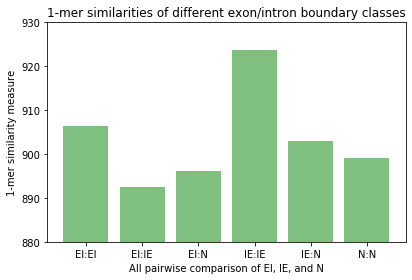

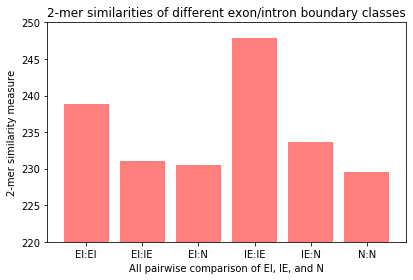

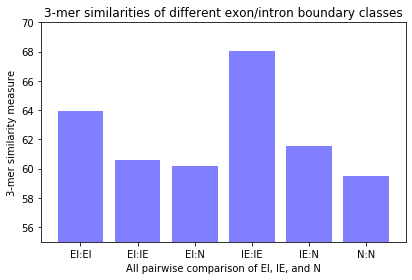

In [30]:
import matplotlib.pyplot as plt # matlab library for visualization
import seaborn as sns
%matplotlib inline

def make_new_barplot(avg_sim_results_dict, k, score_index, ymin=None, ymax=None, colour='red'):
    
    # comparison partners and scores
    label1_label2_pairs = avg_sim_results_dict.keys()
    scores = [avg_sim_results_dict[label1_label2][score_index] for label1_label2 in label1_label2_pairs]
    xindices = np.arange(len(scores))

    ax = plt.gca()
    ax.bar(xindices, scores, width=0.8, alpha=0.5, color=colour)
    ax.set_ylim(ymin, ymax)
    
    # x-ticks and labels
    ax.set_xticks(xindices)
    ax.set_xticklabels(label1_label2_pairs)
    
    # labels and title
    ax.set_xlabel('All pairwise comparison of EI, IE, and N')
    ax.set_ylabel(str(k) + '-mer similarity measure')
    ax.set_title(str(k) + '-mer similarities of different exon/intron boundary classes')
    
    plt.tight_layout()
    plt.show()

make_new_barplot(avg_sim_results_dict, 1, 0, 880, 930, 'green')
make_new_barplot(avg_sim_results_dict, 2, 1, 220, 250, 'red')
make_new_barplot(avg_sim_results_dict, 3, 2, 55, 70, 'blue')

# 3. Additional Questions

### Part 1: Similarity Measures on Sets of Objects

1. Under which conditions will the similarity measures Jaccard, Overlap and Soerensen-Dice produce invalid results?

### Part 2: Similarity Measures on Strings
1. Given a DNA sequence -formed by the four nucleotides A, T, C, G- of length 100, what is the maximum number of 4-mers?
2. What is the effect of 'k' in the k-mer similarity measure?
